# Project Title
## Participants:
### Data Source



In [121]:
# Heart disease project

In [122]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path

In [123]:
#Import csv file

heart_disease_path = Path("heart.csv")
heart_disease_df = pd.read_csv(heart_disease_path)
heart_disease_df.head()

# -- We can remove this latter, I wanted to be able to quickly check what is in which column to make work easier ;) ---

#[age] = age 
#[sex] = sex (1 = male; 0 = female)
#[cp]  =  chest pain type (4 values) 
#[trestbps] = resting blood pressure 
#[chol] = serum cholestoral in mg/dl  
#[fbs] = fasting blood sugar > 120 mg/dl  
#[restecg] = resting electrocardiographic results (values 0,1,2)
#[thalach] = maximum heart rate achieved 
#[exang] = exercise induced angina 
#[oldpeak] = oldpeak = ST depression induced by exercise relative to rest
#[slope] = the slope of the peak exercise ST segment
#[ca] = number of major vessels (0-3) colored by flourosopy 
#[thal] = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
#[target] = The presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Number of women: 312
Number of men: 713
Number of women with heart disease: 226
Number of men with heart disease: 300


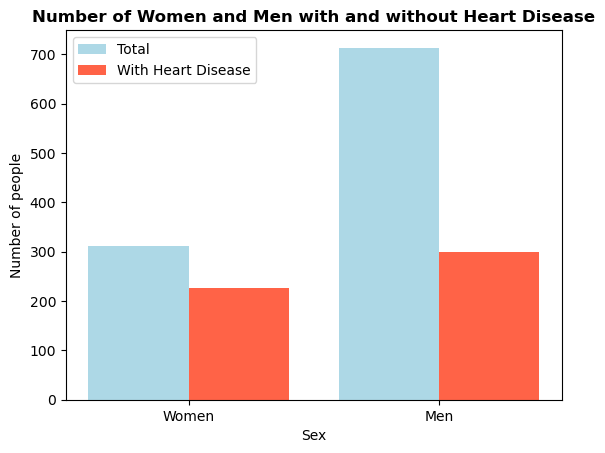

NameError: name 'total_women' is not defined

In [124]:
#Hypothesis#1
#Men are most likely to develop heart disease than women (0 is the no disease, 1 = disease)
#Bar chart (Target vs gender), pie chart

counts = heart_disease_df['sex'].value_counts()
all_women = counts.get(0, 0)  
print(f"Number of women: {all_women}")

counts = heart_disease_df['sex'].value_counts()
all_men = counts.get(1, 0)
print(f"Number of men: {all_men}")

filter_df = heart_disease_df[heart_disease_df['sex'] == 0 ]
count_ill_women = (filter_df['target'] == 1).sum()
print(f"Number of women with heart disease: {count_ill_women}")

filtered_df = heart_disease_df[heart_disease_df['sex'] == 1 ]
count_ill_men = (filtered_df['target'] == 1).sum()
print(f"Number of men with heart disease: {count_ill_men}")


#------------------------------ Bar Chart: -------------------------------
categories = ['Women', 'Men']
total_counts = [all_women, all_men]
ill_counts = [count_ill_women, count_ill_men]

x = range(len(categories))

plt.bar(x, total_counts, width=0.4, label='Total', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], ill_counts, width=0.4, label='With Heart Disease', color='tomato', align='center')

plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Number of Women and Men with and without Heart Disease', fontweight='bold')
plt.xticks([p + 0.2 for p in x], categories)
plt.legend()


plt.show()

#----------------------------- Pie Charts: -------------------------


ill_women = heart_disease_df[(heart_disease_df['sex'] == 0) & (heart_disease_df['target'] == 1)].shape[0]
healthy_women = total_women - ill_women

ill_men = heart_disease_df[(heart_disease_df['sex'] == 1) & (heart_disease_df['target'] == 1)].shape[0]
healthy_men = total_men - ill_men

plt.figure(figsize=(12, 6)) 

labels_women = ['Women with heart disease', 'Healthy Women']
sizes_women = [ill_women, healthy_women]
colors_women = ['tomato', 'lightblue']


plt.subplot(1, 2, 1)
plt.pie(sizes_women, labels=labels_women, colors=colors_women, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Women', fontweight='bold')

labels_men = ['Men with heart disease', 'Healthy Men']
sizes_men = [ill_men, healthy_men]
colors_men = ['tomato', 'lightblue']


plt.subplot(1, 2, 2)
plt.pie(sizes_men, labels=labels_men, colors=colors_men, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Men', fontweight='bold')

plt.tight_layout()

plt.show()



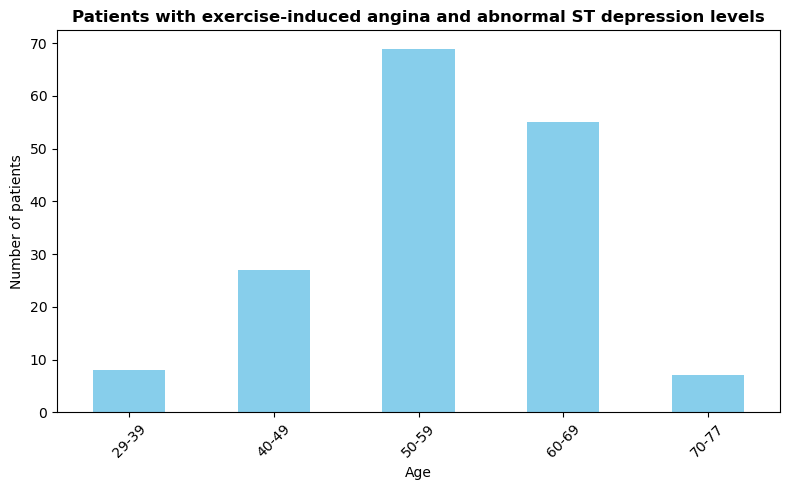

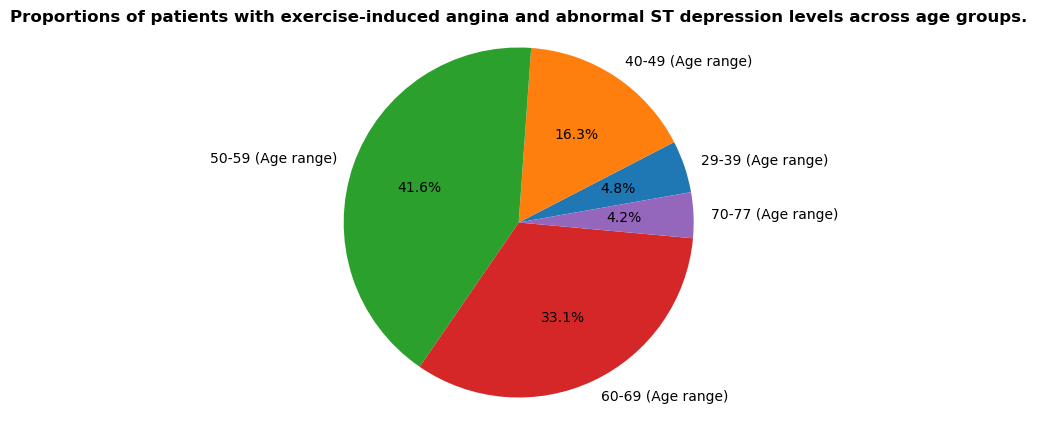

In [125]:
#Hypothesis#2 
#Older patients are more likely to have exercise-induced angina and abnormal ST depression levels.
#Bins to divide age into 5 groups: 29-39, 40-49. 50-69, 60-69, 70-77

#"Measurement. ST segment depression may be determined by measuring the vertical distance between the patient's
#trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it 
#is more than 1 mm in V5-V6, or 1.5 mm in AVF or III."-> from https://en.wikipedia.org/wiki/ST_depression#:~:text=the%20ECG%20paper.-,Measurement,mm%20in%20AVF%20or%20III.

bins = [29, 39, 49, 59, 69, 77]
labels = ['29-39', '40-49', '50-59', '60-69', '70-77']
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=True)


filt_df = heart_disease_df[(heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5)]
double_diagnosis_result = filt_df.groupby('age_group', observed=False).size()

double_diagnosis_result

#--------------------------- BarChart -------------------------------

plt.figure(figsize=(8, 5))
double_diagnosis_result.plot(kind='bar', color='skyblue')

plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Patients with exercise-induced angina and abnormal ST depression levels', fontweight='bold')

plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

#---------------------------Pie Chart -------------------------------

sorted_result = double_diagnosis_result.sort_index()
labels = [f'{label} (Age range)' for label in sorted_result.index]

plt.figure(figsize=(8, 5))
plt.pie(sorted_result, labels=labels, autopct='%1.1f%%', startangle=10)
plt.title('Proportions of patients with exercise-induced angina and abnormal ST depression levels across age groups.', fontweight='bold')
plt.axis('equal')
plt.show()


Number of patients with fasting blood sugar > 120 mg/dl: 153
Number of patients with fasting blood sugar > 120 mg/dl and heart disease: 71
Number of patients with fasting blood sugar <= 120 mg/dl: 872
Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: 455


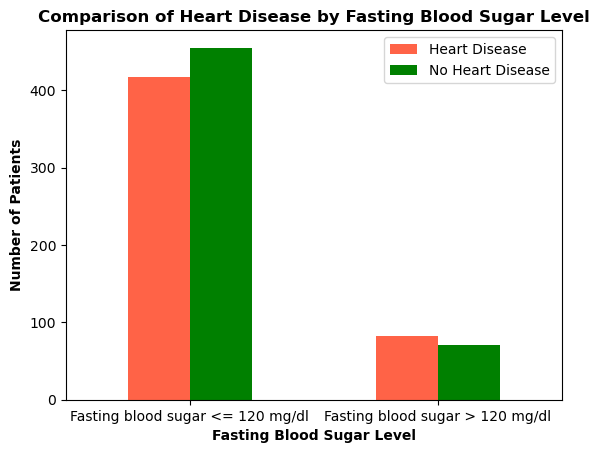

In [126]:
#Hypothesis#3 
#Patients with fasting blood sugar > 120 mg/dl are more likely to have heart disease

#--------- Checking patients with high sugar: -------------

high_sugar = heart_disease_df[heart_disease_df['fbs'] == 1 ]

total_high_sugar_patients = high_sugar.shape[0]
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {total_high_sugar_patients}")

high_sugar_sick = (high_sugar['target'] == 1).sum()
high_sugar_healthy = (high_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar > 120 mg/dl and heart disease: {high_sugar_sick}")

#--------- Checking control group: ------------

low_sugar = heart_disease_df[heart_disease_df['fbs'] == 0 ]

total_low_sugar_patients = low_sugar.shape[0]
print(f"Number of patients with fasting blood sugar <= 120 mg/dl: {total_low_sugar_patients}")

low_sugar_sick = (low_sugar['target'] == 1).sum()
low_sugar_healthy = (low_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: {low_sugar_sick}")

#------------Chart bar ---------------------

summary = heart_disease_df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

summary.plot(kind='bar', stacked=False, color=['tomato', 'green'])
plt.xlabel('Fasting Blood Sugar Level', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Comparison of Heart Disease by Fasting Blood Sugar Level', fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Fasting blood sugar <= 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], rotation=0)
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

#-------------



In [ ]:
#Hypothesis#4 (DANIEL)
 #Patients with higher cholesterol levels and BS >= 120 mg/dl and ST depression induced by exercise relative to rest results are more likely to have chest pain (angina).


In [ ]:
#Hypothesis#5 (KIRSHAN)
#Patients with a higher number of major vessels (colored by fluoroscopy) are less likely to have heart disease

In [ ]:
#Hypothesis#6 (ANVITA)
#Patients with a higher maximum heart rate (THLACH)and Exercise-induced angina (exercise_induced_angina) achieved during exercise are less likely to have heart disease.

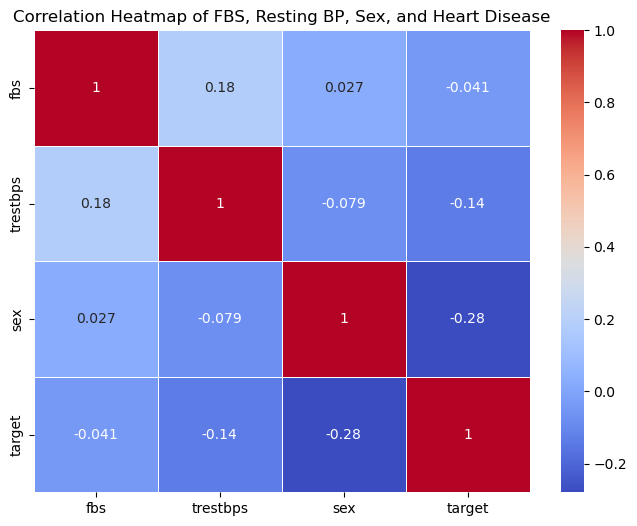

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the file path
file_path = r"C:\Users\board\Project-1\Heart Disease Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select the relevant columns: fasting blood sugar (fbs), resting blood pressure (trestbps), sex, and heart disease indicator (target)
columns_of_interest = ['fbs', 'trestbps', 'sex', 'target']  # Assuming 'target' is the column representing heart disease
data = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title("Correlation Heatmap of FBS, Resting BP, Sex, and Heart Disease")

# Display the heatmap
plt.show()

